In [1]:
import os
from scipy import io
import sys
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### 시각화(랜드마크 찍어보기)

In [ ]:
# 'eyelocation' 키로부터 배열 데이터 추출
if 'eyelocation' not in mat_file:
    raise ValueError("MATLAB 파일에 'eyelocation' 키가 없습니다.")

eyelocation_data = mat_file['eyelocation']

# DataFrame으로 변환
df = pd.DataFrame(eyelocation_data, columns=['eyelocation'])

# Load the eye image
eye_image_left = plt.imread(os.path.join(image_path ,'00000_left.jpg'))
eye_image_right = plt.imread(os.path.join(image_path ,'00000_right.jpg'))

# Plot the eye image
fig, ax = plt.subplots()
ax.imshow(eye_image_left)

# Overlay eyelocation coordinates on the image
for index, row in df.iterrows():
    if index % 2 == 0:  # Even indices represent x-coordinates
        x = row['eyelocation']*90
    else:  # Odd indices represent y-coordinates
        y = row['eyelocation']*90
        ax.add_patch(patches.Circle((x, y), radius=0.1, color='red'))

plt.show()

# Plot the eye image
fig, ax = plt.subplots()
ax.imshow(eye_image_right)

# Overlay eyelocation coordinates on the image
for index, row in df.iterrows():
    if index % 2 == 0:  # Even indices represent x-coordinates
        x = row['eyelocation']*244
    else:  # Odd indices represent y-coordinates
        y = row['eyelocation']*244
        ax.add_patch(patches.Circle((x, y), radius=2, color='red'))

plt.show()

### VOLUME 측정

In [2]:
def count_jpg_files(folder_path):
    jpg_count = 0

    # Iterate over all files in the folder
    for file_name in os.listdir(folder_path):
        # Check if the file has a ".jpg" extension (case-insensitive)
        if file_name.lower().endswith(".jpg"):
            jpg_count += 1

    return jpg_count

def count_jpg_files_in_folders(base_folder, start_folder=0, end_folder=49):
    # Dictionary to store JPEG file counts for each folder
    folder_jpg_counts = {}
    total_jpg_count = 0

    # Iterate over folders in the specified range
    for folder_number in range(start_folder, end_folder + 1):
        # Create the absolute path for the folder
        folder_path = os.path.abspath(os.path.join(base_folder, f's{folder_number:02d}',"test"))

        # Check if the folder exists
        if os.path.exists(folder_path):
            # Count JPEG files in the folder
            jpg_count = count_jpg_files(folder_path)

            # Store folder name and JPEG file count in the dictionary
            folder_jpg_counts[f'{folder_number:02d}'] = jpg_count

            # Update total count
            total_jpg_count += jpg_count

            # Print the result
            print(f"Folder 's{folder_number:02d}' JPEG file count: {jpg_count}")
        else:
            print(f"Folder 's{folder_number:02d}' does not exist.")

    # Print the total count
    print(f"\nTotal JPEG file count for all folders: s{total_jpg_count}")

    return folder_jpg_counts

# Specify the path to the base folder
base_folder_path = "nsmount/UTMULTIVIEW/data/rawdata"

# Call the function to count JPEG files for each existing folder in the range
folder_jpg_counts = count_jpg_files_in_folders(base_folder_path)

Folder 's00' JPEG file count: 1280
Folder 's01' JPEG file count: 1280
Folder 's02' JPEG file count: 1280
Folder 's03' JPEG file count: 1280
Folder 's04' JPEG file count: 1280
Folder 's05' JPEG file count: 1280
Folder 's06' JPEG file count: 1280
Folder 's07' JPEG file count: 1280
Folder 's08' JPEG file count: 1280
Folder 's09' JPEG file count: 1280


KeyboardInterrupt: 

### 이미지 속성 확인

In [2]:
syn_img_path = "nsmount/UTMULTIVIEW/data/rawdata/s00/synth"
test_img_path = "nsmount/UTMULTIVIEW/data/rawdata/s00/test"
org_img_path = " nsmount/UTMULTIVIEW/org_data/UT/s00/raw/img001/images"

In [3]:
# Load the eye image
img = plt.imread(os.path.join(org_img_path,'00000000.jpg'))

FileNotFoundError: [Errno 2] No such file or directory: ' nsmount/UTMULTIVIEW/org_data/UT/s00/raw/img001/images/00000000.jpg'

In [34]:
print("이미지 크기:", img.shape)  # (높이, 너비, 채널)
print("이미지 데이터 타입:", img.dtype)  # 픽셀 데이터 타입
print("픽셀 값 (좌상단 픽셀):", img[0, 0])  # 좌상단 픽셀의 BGR 값

이미지 크기: (36, 60, 3)
이미지 데이터 타입: uint8
픽셀 값 (좌상단 픽셀): [211 211 211]


# 3D GAZE값 시각화 
- 어떤 어떤 정보를 이용해서 나타내야 하는지 잘 모르겠음
- 1번째로 다루었던 데이터보다 친절하고 제공되는 데이터도 많아서 좋긴 한데 너무 많이 줘서 어디에 뭘 이용하고 하는지를 잘 모르겠음
- 일단 2D GAZE를 먼저 나타내보자

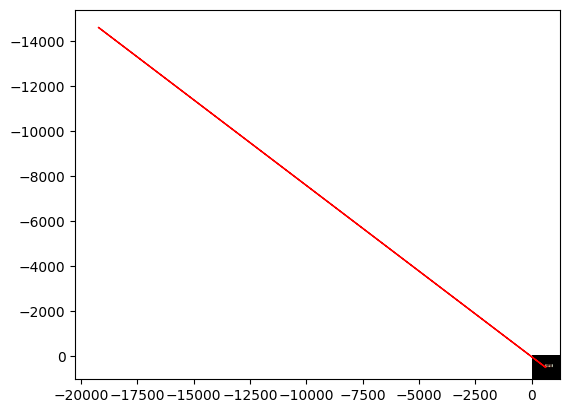

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Given camera parameters
focal_length_x = 1584.30587022
focal_length_y = 1588.27122533
principal_point_x = 633.206099743
principal_point_y = 505.326180791

# Intrinsic matrix K
K = np.array([[focal_length_x, 0, principal_point_x],
              [0, focal_length_y, principal_point_y],
              [0, 0, 1]])

# Given monitor pose
monitor_pose_translation = np.array([509.13201593, -120.17664071, 138.67884402])
monitor_pose_rotation = np.array([[-0.89930096, -0.02878745, 0.43638178],
                                  [-0.00610714, 0.99856052, 0.05328788],
                                  [-0.43728764, 0.04525679, -0.89818224]])

# Given eye gaze information
gx_mm = 108.974
gy_mm = 192.465

# Convert eye gaze information to global/world coordinates using monitor pose
gaze_endpoint_global = np.array([gx_mm, gy_mm, 0])  # Assuming the Z-coordinate is 0 in the monitor coordinate system
gaze_endpoint_global = np.dot(monitor_pose_rotation.T, gaze_endpoint_global - monitor_pose_translation)

# Assuming the gaze originates from the camera's optical center
camera_center = np.array([0, 0, 0])

# Calculate the endpoint of the gaze vector in camera coordinates
gaze_endpoint_camera = camera_center + gaze_endpoint_global

# Convert the endpoint to image coordinates using the camera projection matrix
gaze_endpoint_image_homogeneous = np.dot(K, gaze_endpoint_camera)
gaze_endpoint_image = gaze_endpoint_image_homogeneous[:2] / gaze_endpoint_image_homogeneous[2]

# Load the image
image_path = "nsmount/UTMULTIVIEW/org_data/UT/s00/raw/img000/images"
image = plt.imread(os.path.join(image_path, '00000000.jpg'))

# Draw the gaze direction on the image
plt.imshow(image)
plt.arrow(principal_point_x, principal_point_y, gaze_endpoint_image[0] - principal_point_x, gaze_endpoint_image[1] - principal_point_y,
          head_width=20, head_length=10, fc='red', ec='red')
plt.show()

# 2D GAZE 시각화
-  올바른 방향을 잘 나타내고 있는것으로 보이는 듯?

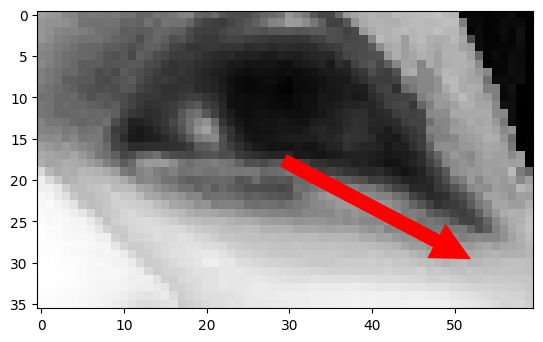

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 2D 시선 방향
gaze_2d = np.array([0.6173748487218621, -0.5412468198990349])

# 이미지 로드 (실제 이미지 경로로 'your_image_path.jpg'를 대체하십시오)
image_path = "nsmount/UTMULTIVIEW/data/rawdata/s00/synth/1.jpg"
image = plt.imread(image_path)

# 이미지 해상도 (가로, 세로)
image_height, image_width, _ = image.shape

# 길이를 조절하는 화살표 스케일
arrow_scale = 2  # 원하는 길이로 조절하십시오

# 이미지 좌표계에서 시선 벡터의 끝점 계산
gaze_endpoint_image = np.array([image_width / 2 + arrow_scale * gaze_2d[0] * image_width / 4,
                                image_height / 2 - arrow_scale * gaze_2d[1] * image_height / 4])

# 빨간 화살표로 이미지에 시선 방향 그리기
plt.imshow(image)
plt.arrow(image_width / 2, image_height / 2, gaze_endpoint_image[0] - image_width / 2, gaze_endpoint_image[1] - image_height / 2,
          head_width=2, head_length=2, fc='red', ec='red', linewidth=10)
plt.show()

# 2D GAZE 분포 확인 

In [2]:
from tqdm import tqdm
import os
import pandas as pd

total_label_data = []

def read_label_file(file_path):
    # Assuming the file has columns: Image, Origin, WhichEye, 3DGaze, 3DHead, 2DGaze, 2DHead
    column_names = ["Image", "Origin", "WhichEye", "3DGaze", "3DHead", "2DGaze", "2DHead"]

    # Read the .label file into a Pandas DataFrame
    df = pd.read_csv(file_path, sep=' ', header=0, names=column_names)

    return df

base_path = 'nsmount/UTMULTIVIEW/data/labeldata/synth'

# Initialize an empty DataFrame to store the combined data
total_label_data = pd.DataFrame()

# Example usage:
#for file_name in tqdm(os.listdir(base_path), desc="processing Image files"):
for file_name in os.listdir(base_path):
    file_path = os.path.join(base_path, file_name)

    # Check if the file is a .label file
    if file_name.endswith(".label"):
        label_data = read_label_file(file_path)

        # Concatenate the data to the total_label_data DataFrame
        total_label_data = pd.concat([total_label_data, label_data], ignore_index=True)

# Display the combined DataFrame
total_label_data

,Image,Origin,WhichEye,3DGaze,3DHead,2DGaze,2DHead
0,s00\synth\1.jpg,0_0.bmp,left,"0.496153,-0.515205,-0.698853","-0.687755,-0.399297,-0.145311","-0.6173748487218621,0.5412468198990349","-0.41644136742980464,0.6980376060518174"
1,s00\synth\2.jpg,0_1.bmp,left,"0.540142,-0.419865,-0.729356","-0.578029,-0.434769,-0.131637","-0.6374410443665145,0.43329656881006595","-0.4478325945345889,0.5880026215137644"
2,s00\synth\3.jpg,0_2.bmp,left,"0.578349,-0.316557,-0.751867","-0.465864,-0.46535,-0.112614","-0.6556870774535714,0.3220976175690576","-0.47436454551208396,0.47486887619060403"
3,s00\synth\4.jpg,0_3.bmp,left,"0.608592,-0.206504,-0.766141","-0.351526,-0.490189,-0.0889293","-0.6712926321448014,0.20800059032289608","-0.4955645606786943,0.35893323175984126"
4,s00\synth\5.jpg,0_4.bmp,left,"0.628991,-0.0914064,-0.772021","-0.235411,-0.508537,-0.0614948","-0.6836601512094123,0.09153416635425216","-0.5110279053873412,0.2406817396227545"
...,...,...,...,...,...,...,...
1151995,s49\synth\23036.jpg,159_139.bmp,left,"-0.500672,0.285229,-0.817296","0.124966,0.623464,-0.0403295","0.5496295891045632,-0.28924534477452246","0.6243440718387974,-0.12919246207927093"
1151996,s49\synth\23037.jpg,159_140.bmp,left,"-0.465615,0.404661,-0.787053","0.248826,0.609116,-0.0786826","0.5342149066942703,-0.41660809236189633","0.6125317991372524,-0.2569272482539216"
1151997,s49\synth\23038.jpg,159_141.bmp,left,"-0.418141,0.515146,-0.748186","0.370586,0.585887,-0.113256","0.5096300085673109,-0.5411779818960092","0.5931996163351761,-0.38190478717665155"
1151998,s49\synth\23039.jpg,159_142.bmp,left,"-0.36147,0.614627,-0.701123","0.489442,0.554705,-0.142555","0.4760168834924341,-0.6619130198789089","0.5668396637337665,-0.5030982744055654"


In [4]:
import numpy as np
# Assuming 'total_label_data' DataFrame is already created from your previous code

# Create a new DataFrame with separate columns for x and y
total_label_data[['2DGaze_X', '2DGaze_Y']] = total_label_data['2DGaze'].str.split(',', expand=True)

# Convert the new columns to numeric values
total_label_data[['2DGaze_X', '2DGaze_Y']] = total_label_data[['2DGaze_X', '2DGaze_Y']].apply(pd.to_numeric)

# Convert radians to degrees
total_label_data['2DGaze_X_deg'] = np.degrees(total_label_data['2DGaze_X'])
total_label_data['2DGaze_Y_deg'] = np.degrees(total_label_data['2DGaze_Y'])

# Display the updated DataFrame
total_label_data

,Image,Origin,WhichEye,3DGaze,3DHead,2DGaze,2DHead,2DGaze_X,2DGaze_Y,2DGaze_X_deg,2DGaze_Y_deg
0,s00\synth\1.jpg,0_0.bmp,left,"0.496153,-0.515205,-0.698853","-0.687755,-0.399297,-0.145311","-0.6173748487218621,0.5412468198990349","-0.41644136742980464,0.6980376060518174",-0.617375,0.541247,-35.372973,31.011158
1,s00\synth\2.jpg,0_1.bmp,left,"0.540142,-0.419865,-0.729356","-0.578029,-0.434769,-0.131637","-0.6374410443665145,0.43329656881006595","-0.4478325945345889,0.5880026215137644",-0.637441,0.433297,-36.522682,24.826065
2,s00\synth\3.jpg,0_2.bmp,left,"0.578349,-0.316557,-0.751867","-0.465864,-0.46535,-0.112614","-0.6556870774535714,0.3220976175690576","-0.47436454551208396,0.47486887619060403",-0.655687,0.322098,-37.568102,18.454834
3,s00\synth\4.jpg,0_3.bmp,left,"0.608592,-0.206504,-0.766141","-0.351526,-0.490189,-0.0889293","-0.6712926321448014,0.20800059032289608","-0.4955645606786943,0.35893323175984126",-0.671293,0.208001,-38.462235,11.917556
4,s00\synth\5.jpg,0_4.bmp,left,"0.628991,-0.0914064,-0.772021","-0.235411,-0.508537,-0.0614948","-0.6836601512094123,0.09153416635425216","-0.5110279053873412,0.2406817396227545",-0.683660,0.091534,-39.170841,5.244521
...,...,...,...,...,...,...,...,...,...,...,...
1151995,s49\synth\23036.jpg,159_139.bmp,left,"-0.500672,0.285229,-0.817296","0.124966,0.623464,-0.0403295","0.5496295891045632,-0.28924534477452246","0.6243440718387974,-0.12919246207927093",0.549630,-0.289245,31.491456,-16.572537
1151996,s49\synth\23037.jpg,159_140.bmp,left,"-0.465615,0.404661,-0.787053","0.248826,0.609116,-0.0786826","0.5342149066942703,-0.41660809236189633","0.6125317991372524,-0.2569272482539216",0.534215,-0.416608,30.608260,-23.869885
1151997,s49\synth\23038.jpg,159_141.bmp,left,"-0.418141,0.515146,-0.748186","0.370586,0.585887,-0.113256","0.5096300085673109,-0.5411779818960092","0.5931996163351761,-0.38190478717665155",0.509630,-0.541178,29.199649,-31.007214
1151998,s49\synth\23039.jpg,159_142.bmp,left,"-0.36147,0.614627,-0.701123","0.489442,0.554705,-0.142555","0.4760168834924341,-0.6619130198789089","0.5668396637337665,-0.5030982744055654",0.476017,-0.661913,27.273758,-37.924822


### joint plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def draw_jointplot(dataset, xlabel, ylabel, save_name, unit='degree', reverse=False):
    plt.figure(figsize=(16, 12))
    sns.jointplot(x=xlabel, y=ylabel, data=dataset, kind='kde', cmap='RdYlGn')
    plt.xlabel(f'{xlabel}_{unit}', fontsize=20)
    plt.ylabel(f'{ylabel}_{unit}', fontsize=20)
    if reverse == True: 
        plt.gca().invert_yaxis()
    plt.savefig(save_name)
    print('save',save_name)

dataset = total_label_data
xlabel = '2DGaze_X_deg'
ylabel = '2DGaze_Y_deg'
save_name = 'kde'

draw_jointplot(dataset, xlabel, ylabel, save_name)
plt.show()

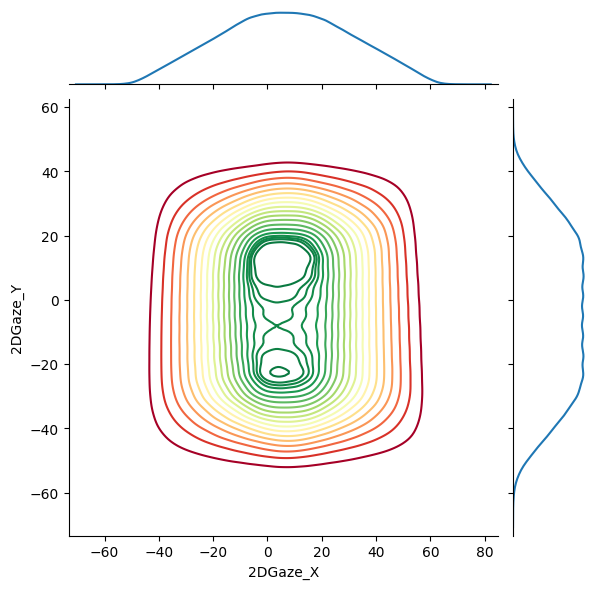

<Figure size 1600x1200 with 0 Axes>

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'total_label_data' DataFrame is already created from your previous code

# Plotting the jointplot
sns.jointplot(data=total_label_data, x='2DGaze_X_deg', y='2DGaze_Y_deg', kind='kde', bw_method= 0.1,levels=20, cmap='RdYlGn')
plt.xlabel('2DGaze_X',fontsize=10)
plt.ylabel('2DGaze_Y',fontsize=10)
plt.figure(figsize=(16, 12))
plt.show()

### heat map

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152000 entries, 0 to 1151999
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Image         1152000 non-null  object 
 1   Origin        1152000 non-null  object 
 2   WhichEye      1152000 non-null  object 
 3   3DGaze        1152000 non-null  object 
 4   3DHead        1152000 non-null  object 
 5   2DGaze        1152000 non-null  object 
 6   2DHead        1152000 non-null  object 
 7   2DGaze_X      1152000 non-null  float64
 8   2DGaze_Y      1152000 non-null  float64
 9   2DGaze_X_deg  1152000 non-null  float64
 10  2DGaze_Y_deg  1152000 non-null  float64
dtypes: float64(4), object(7)
memory usage: 96.7+ MB


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

dataset = total_label_data
xlabel = '2DGaze_X_deg'
ylabel = '2DGaze_Y_deg'
save_name = 'hist'

def draw_heatmap(dataset, xlabel, ylabel, save_name, unit='degree', font_size=20,reverse=False):
    plt.figure(figsize=(16, 12))
    sns.heatmap(data=dataset, cmap='YlGnBu', annot=True, fmt="d", linewidths=.5, annot_kws={"size": font_size})
    plt.xlabel(f'{xlabel}_{unit}', fontsize=font_size)
    plt.xticks(fontsize=20)
    plt.ylabel(f'{ylabel}_{unit}', fontsize=font_size)
    plt.yticks(fontsize=20)
    if reverse == True: 
        plt.gca().invert_yaxis()
    plt.savefig(save_name)
    print('save',save_name)

draw_heatmap(dataset, xlabel, ylabel, save_name, unit='degree', font_size=20,reverse=False)
plt.show()

ValueError: could not convert string to float: 's00\\synth\\1.jpg'

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

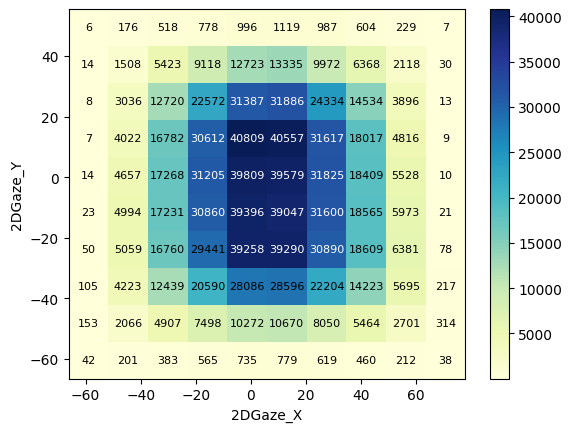

<Figure size 1600x1200 with 0 Axes>

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'total_label_data' DataFrame is already created from your previous code

cmap = sns.color_palette("YlGnBu", as_cmap=True)

# Create a 2D histogram with annotations
hist_data, x_edges, y_edges, im = plt.hist2d(total_label_data['2DGaze_X_deg'], total_label_data['2DGaze_Y_deg'], bins=10, cmap=cmap)

# Annotate each bin with its count
for i in range(len(x_edges) - 1):
    for j in range(len(y_edges) - 1):
        count = int(hist_data[i, j])
        if count > 0:
            x_center = (x_edges[i] + x_edges[i + 1]) / 2
            y_center = (y_edges[j] + y_edges[j + 1]) / 2
            if count > 30000 : 
                plt.text(x_center, y_center, str(count), color='white',
                    ha='center', va='center', fontsize=8)
            else :
                plt.text(x_center, y_center, str(count), color='black',
                    ha='center', va='center', fontsize=8)
# Add a color bar
cbar = plt.colorbar(im)

plt.xlabel('2DGaze_X',fontsize=10)
plt.ylabel('2DGaze_Y',fontsize=10)
plt.figure(figsize=(16, 12))
